In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
test_df = pd.read_csv('test.csv')
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


<AxesSubplot:>

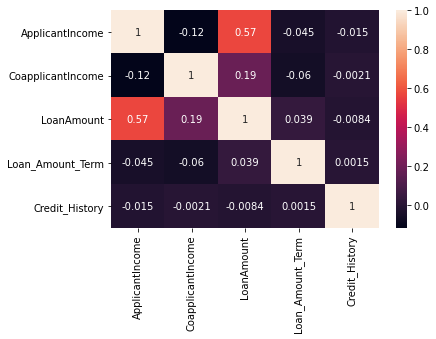

In [6]:
sns.heatmap(train_df.corr(),annot=True)

In [7]:
train_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

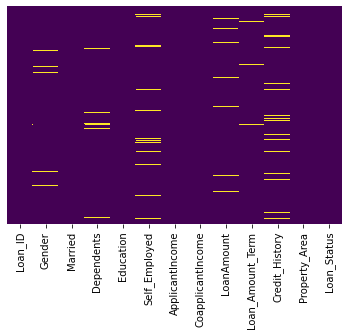

In [8]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
train_df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [10]:
train_df['Gender'].fillna(method = 'ffill',inplace=True)

In [11]:
train_df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [12]:
train_df['Dependents'].fillna(method = 'ffill',inplace=True)

In [13]:
train_df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [14]:
train_df['Self_Employed'].fillna(method = 'ffill',inplace=True)

In [15]:
train_df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [16]:
train_df['Credit_History'].fillna(method = 'ffill',inplace=True)

In [17]:
train_df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [18]:
train_df['LoanAmount'].fillna(train_df['LoanAmount'].mean(),inplace=True)

In [19]:
train_df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [20]:
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mean(),inplace=True)

In [21]:
train_df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [22]:
train_df['Married'].fillna(method = 'ffill',inplace=True)

<AxesSubplot:>

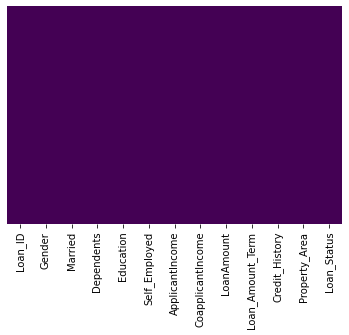

In [23]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [24]:
test_df.dropna(inplace=True)

In [25]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            289 non-null    object 
 1   Gender             289 non-null    object 
 2   Married            289 non-null    object 
 3   Dependents         289 non-null    object 
 4   Education          289 non-null    object 
 5   Self_Employed      289 non-null    object 
 6   ApplicantIncome    289 non-null    int64  
 7   CoapplicantIncome  289 non-null    int64  
 8   LoanAmount         289 non-null    float64
 9   Loan_Amount_Term   289 non-null    float64
 10  Credit_History     289 non-null    float64
 11  Property_Area      289 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 29.4+ KB


In [27]:
train_df = train_df.drop(columns=['Loan_ID'])
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

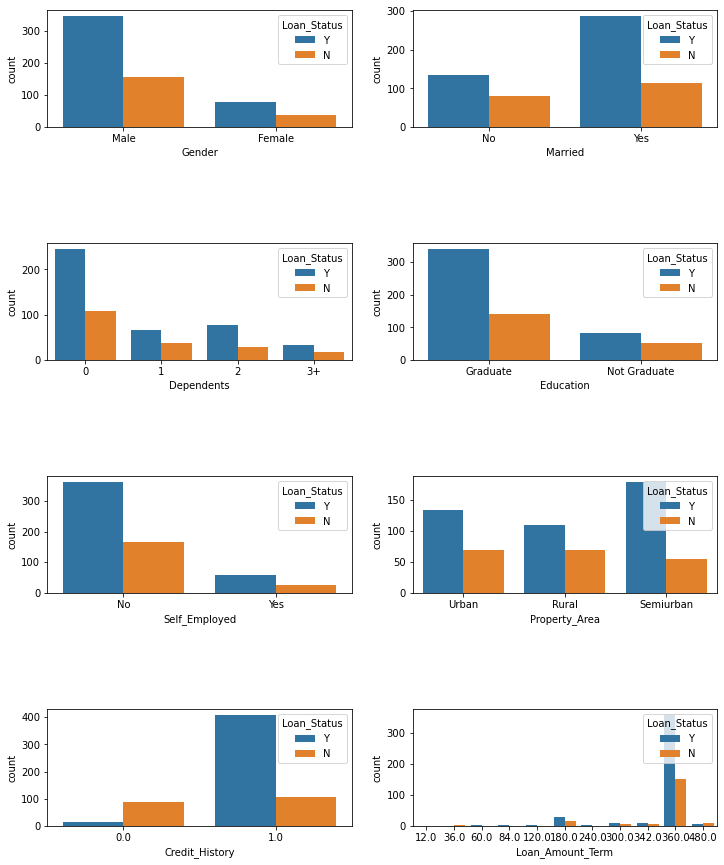

In [28]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train_df,hue='Loan_Status',ax=axes[row,col])

plt.subplots_adjust(hspace=1)

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  614.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   84.037468
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.250000
50%        3812.500000        1188.500000  129.000000
75%        5795.000000        2297.250000  164.750000
max       81000.000000       41667.000000  700.000000


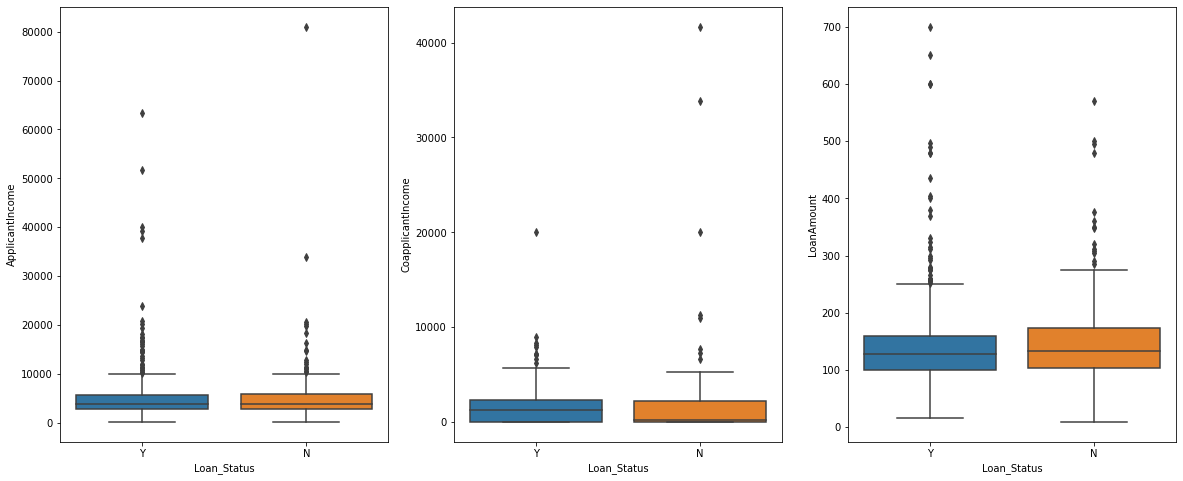

In [29]:
fig,axes = plt.subplots(1,3,figsize=(20,8))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=train_df,x='Loan_Status',ax=axes[idx])

print(train_df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

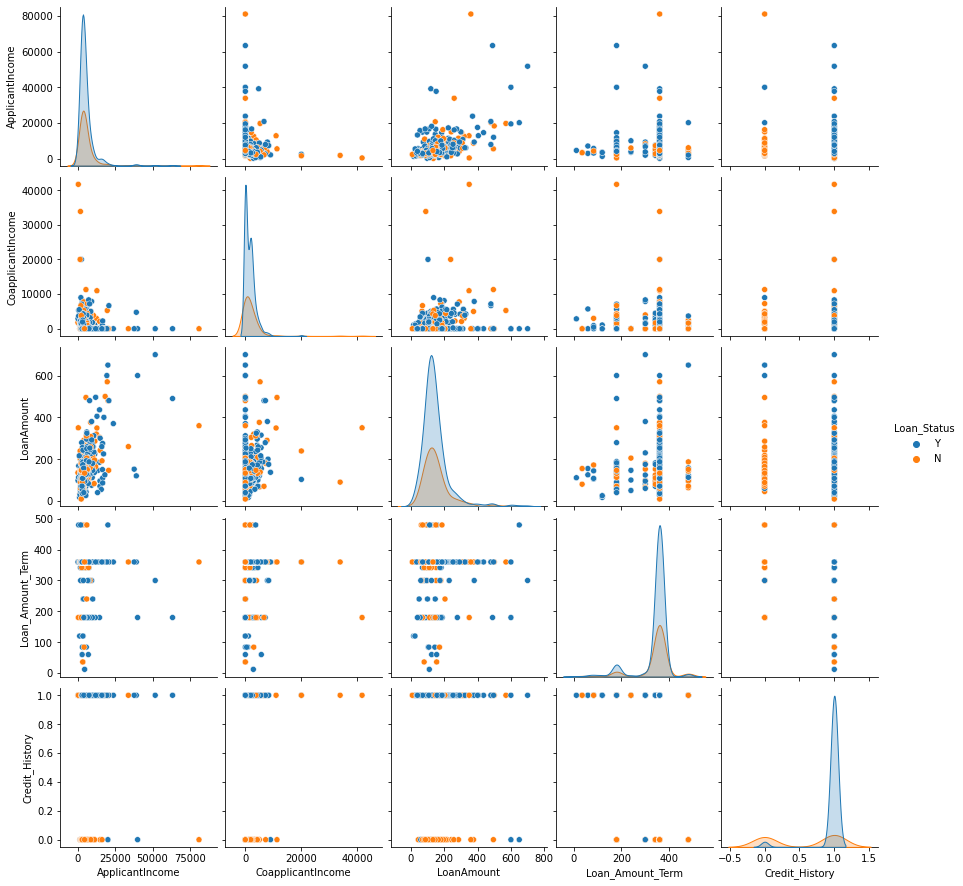

In [30]:
sns.pairplot(train_df, hue = 'Loan_Status')

In [31]:
df_cat = test_df.select_dtypes(object)
df_num = test_df.select_dtypes(['int64', 'float64'])

In [32]:
for col in df_cat:
    le =LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [33]:
df = pd.concat([df_cat,df_num],axis=1)

In [34]:
df

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,1,0,0,0,2,5720,0,110.0,360.0,1.0
1,1,1,1,0,0,2,3076,1500,126.0,360.0,1.0
2,1,1,2,0,0,2,5000,1800,208.0,360.0,1.0
4,1,0,0,1,0,2,3276,0,78.0,360.0,1.0
5,1,1,0,1,1,2,2165,3422,152.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
361,1,1,1,0,0,1,2269,2167,99.0,360.0,1.0
362,1,1,3,1,1,2,4009,1777,113.0,360.0,1.0
363,1,1,0,0,0,2,4158,709,115.0,360.0,1.0
365,1,1,0,0,0,0,5000,2393,158.0,360.0,1.0


In [36]:
df_cat = train_df.select_dtypes(object)
df_num = train_df.select_dtypes(['int64', 'float64'])

In [37]:
for col in df_cat:
    le =LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [38]:
df_cat

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1
610,1,1,3,0,0,0,1
611,1,1,1,0,0,2,1
612,1,1,2,0,0,2,1


In [39]:
df = pd.concat([df_cat,df_num],axis=1)

In [40]:
df

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,1,5849,0.0,146.412162,360.0,1.0
1,1,1,1,0,0,0,0,4583,1508.0,128.000000,360.0,1.0
2,1,1,0,0,1,2,1,3000,0.0,66.000000,360.0,1.0
3,1,1,0,1,0,2,1,2583,2358.0,120.000000,360.0,1.0
4,1,0,0,0,0,2,1,6000,0.0,141.000000,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1,2900,0.0,71.000000,360.0,1.0
610,1,1,3,0,0,0,1,4106,0.0,40.000000,180.0,1.0
611,1,1,1,0,0,2,1,8072,240.0,253.000000,360.0,1.0
612,1,1,2,0,0,2,1,7583,0.0,187.000000,360.0,1.0


In [46]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [47]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,stratify = y,random_state=0)

In [50]:
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)
print(f'Accuracy Score : {accuracy_score(ytest,ypred)}')
print('\n\nClassification Report :')
print(classification_report(ytest,ypred))

print("Validation Mean F1 Score: ",cross_val_score(dt,xtrain,ytrain,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(dt,xtrain,ytrain,cv=5,scoring='accuracy').mean())

Accuracy Score : 0.8441558441558441


Classification Report :
              precision    recall  f1-score   support

         0.0       0.55      0.24      0.33        25
         1.0       0.87      0.96      0.91       129

    accuracy                           0.84       154
   macro avg       0.71      0.60      0.62       154
weighted avg       0.81      0.84      0.82       154

Validation Mean F1 Score:  0.63581416370065
Validation Mean Accuracy:  0.8021739130434783


In [51]:
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)
print(f'Accuracy Score : {accuracy_score(ytest,ypred)}')
print('\n\nClassification Report :')
print(classification_report(ytest,ypred))

print("Validation Mean F1 Score: ",cross_val_score(dt,xtrain,ytrain,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(dt,xtrain,ytrain,cv=5,scoring='accuracy').mean())

Accuracy Score : 0.8311688311688312


Classification Report :
              precision    recall  f1-score   support

         0.0       0.47      0.28      0.35        25
         1.0       0.87      0.94      0.90       129

    accuracy                           0.83       154
   macro avg       0.67      0.61      0.63       154
weighted avg       0.80      0.83      0.81       154

Validation Mean F1 Score:  0.6642618565644881
Validation Mean Accuracy:  0.8065217391304348


In [64]:
accuracy = []
for i in range(1,100):
    rf = RandomForestClassifier(max_depth=i,random_state=1)
    rf.fit(xtrain,ytrain)
    ypred = rf.predict(xtest)
    ac = accuracy_score(ytest,ypred)
    accuracy.append((ac))

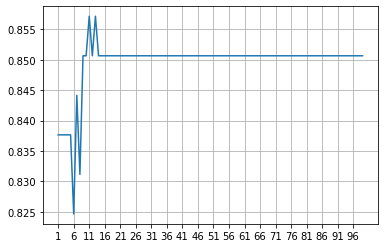

In [69]:
plt.plot(range(1,100), accuracy)
plt.xticks(np.arange(1,100,5))
plt.grid()
plt.show()